![title](./00_titleimage.png)
## Predicting Employee Attrition
---
- IBM 데이터 과학자들이 만든 가상의 HR 데이터셋입니다.
- 1,470명에 대한 35개의 변수가 기록되어 있고, 종속변수는 <b>Attrition</b>, 즉 0 또는 1의 퇴사 여부입니다.
- Data Source: https://www.kaggle.com/pavansubhasht/ibm-hr-analytics-attrition-dataset

## 순서
0. 패키지 import
1. 데이터 설명 및 전처리
2. EDA
3. 예측을 위한 데이터 처리
4. 머신러닝 알고리즘을 이용한 퇴사자 예측
5. 이후의 방향

## 0. 패키지 import
---
### 0.1 필요한 패키지 import

In [34]:
from collections import OrderedDict

from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split


import pandas as pd
import numpy as np
import missingno
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import matplotlib as mpl


# warnings 끄기
warnings.filterwarnings('ignore')

# pandas display option view row & columns
pd.set_option('display.max_row', 500)
pd.set_option('display.max_columns', 100)

# # matplotlib set
plt.rc('font', family='AppleGothic') # For MacOS
plt.rc('axes', unicode_minus=False)

%matplotlib inline

<br>

## 1. 데이터 설명 및 전처리
---

### 1.1 데이터 로드 및 체크

In [3]:
data = pd.read_csv('WA_Fn-UseC_-HR-Employee-Attrition.csv')
data.tail()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
1465,36,No,Travel_Frequently,884,Research & Development,23,2,Medical,1,2061,3,Male,41,4,2,Laboratory Technician,4,Married,2571,12290,4,Y,No,17,3,3,80,1,17,3,3,5,2,0,3
1466,39,No,Travel_Rarely,613,Research & Development,6,1,Medical,1,2062,4,Male,42,2,3,Healthcare Representative,1,Married,9991,21457,4,Y,No,15,3,1,80,1,9,5,3,7,7,1,7
1467,27,No,Travel_Rarely,155,Research & Development,4,3,Life Sciences,1,2064,2,Male,87,4,2,Manufacturing Director,2,Married,6142,5174,1,Y,Yes,20,4,2,80,1,6,0,3,6,2,0,3
1468,49,No,Travel_Frequently,1023,Sales,2,3,Medical,1,2065,4,Male,63,2,2,Sales Executive,2,Married,5390,13243,2,Y,No,14,3,4,80,0,17,3,2,9,6,0,8
1469,34,No,Travel_Rarely,628,Research & Development,8,3,Medical,1,2068,2,Male,82,4,2,Laboratory Technician,3,Married,4404,10228,2,Y,No,12,3,1,80,0,6,3,4,4,3,1,2


1. Age : 해당 직원의 나이
2. Attrition : 퇴직 여부 Target값 (종속변수)
3. BusinessTravel : 출장의 빈도
4. DailyRate : 일 대비 급여의 수준
5. Department : 업무분야
6. DistanceFromHome : 집과의 거리
7. Education : 교육의 정도
    - 1 : 'Below College' : 대학 이하
    - 2 : 'College' : 전문대
    - 3 : 'Bachelor' : 학사
    - 4 : 'Master' : 석사
    - 5 : 'Doctor' : 박사
8. EducationField : 전공
9. EmployeeCount : 직원 숫자
10. EmployeeNumber : 직원 ID
11. EnvironmentSatisfaction : 업무 환경에 대한 만족도
    - 1 : 'Low'
    - 2 : 'Medium'
    - 3 : 'High'
    - 4 : 'Very High'
12. Gender : 성별
13. HourlyRate : 시간 대비 급여의 수준
14. JobInvolvement : 업무 참여도
    - 1 : 'Low'
    - 2 : 'Medium'
    - 3 : 'High'
    - 4 : 'Very High'
15. JobLevel : 업무의 수준
16. JobRole : 업무 종류
17. JobSatisfaction : 업무 만족도
    - 1 : 'Low'
    - 2 : 'Medium'
    - 3 : 'High'
    - 4 : 'Very High'
18. MaritalStatus : 결혼 여부
19. MonthlyIncome : 월 소득
20. MonthlyRate : 월 대비 급여 수준
21. NumCompaniesWorked : 일한 회사의 수
22. Over18 : 18세 이상
23. OverTime : 규정외 노동시간
24. PercentSalaryHike : 급여의 증가분 백분율
25. PerformanceRating : 업무 성과
    - 1 : 'Low'
    - 2 : 'Good'
    - 3 : 'Excellent'
    - 4 : 'Outstanding'
26. RelationshipSatisfaction : 대인관계 만족도
    - 1 : 'Low'
    - 2 : 'Medium'
    - 3 : 'High'
    - 4 : 'Very High'
27. StandardHours : 표준 시간
28. StockOptionLevel : 스톡옵션 정도
29. TotalWorkingYears : 경력 기간
30. TrainingTimesLastYear : 교육 시간
31. WorkLifeBalance : 일과 생활의 균형 정도
    - 1 : 'Bad'
    - 2 : 'Good'
    - 3 : 'Better'
    - 4 : 'Best'
32. YearsAtCompany : 근속 연수
33. YearsInCurrentRole : 현재 역할의 년수
34. YearsSinceLastPromotion : 마지막 프로모션
35. YearsWithCurrManager : 현재 관리자와 함께 보낸 시간

- 총 독립변수 : 34개, 종속변수 1개 확인 됩니다.

<br>

In [54]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

- Education, EnvironmentSatisfaction, JobInvolvement, JobSatisfaction, PerformanceRating, RelationshipSatisfaction, WorkLifeBalance, JobLevel, StockOptionLevel, NumCompaniesWorked
- 위의 컬럼들이 실제론 Category column인데, int형으로 되어있습니다.
- int형 컬럼들을 Category 컬럼으로 바꿔주어야 EDA 할때 조금더 편합니다. \<int형 26개, category형 9개>

<br>

### 1.2 EDA를 쉽게하기 위해 데이터값을 Object로 변경

In [4]:
# Education
change_dict = {1: 'Below College', 2: 'College', 3: 'Bachelor', 4: 'Master', 5: 'Doctor'}
data.replace({'Education': change_dict}, inplace=True)
data['Education'].unique()

array(['College', 'Below College', 'Master', 'Bachelor', 'Doctor'],
      dtype=object)

In [5]:
# EnvironmentSatisfaction
change_dict = {1: 'Low', 2: 'Medium', 3: 'High', 4: 'Very High'}
data.replace({'EnvironmentSatisfaction': change_dict}, inplace=True)
data['EnvironmentSatisfaction'].unique()

array(['Medium', 'High', 'Very High', 'Low'], dtype=object)

In [6]:
# JobInvolvement
change_dict = {1: 'Low', 2: 'Medium', 3: 'High', 4: 'Very High'}
data.replace({'JobInvolvement': change_dict}, inplace=True)
data['JobInvolvement'].unique()

array(['High', 'Medium', 'Very High', 'Low'], dtype=object)

In [7]:
# JobSatisfaction
change_dict = {1: 'Low', 2: 'Medium', 3: 'High', 4: 'Very High'}
data.replace({'JobSatisfaction': change_dict}, inplace=True)
data['JobSatisfaction'].unique()

array(['Very High', 'Medium', 'High', 'Low'], dtype=object)

In [8]:
# PerformanceRating
change_dict = {1: 'Low', 2: 'Good', 3: 'Excellent', 4: 'Outstanding'}
data.replace({'PerformanceRating': change_dict}, inplace=True)
data['PerformanceRating'].unique()

array(['Excellent', 'Outstanding'], dtype=object)

In [9]:
# RelationshipSatisfaction
change_dict = {1: 'Low', 2: 'Medium', 3: 'High', 4: 'Very High'}
data.replace({'RelationshipSatisfaction': change_dict}, inplace=True)
data['RelationshipSatisfaction'].unique()

array(['Low', 'Very High', 'Medium', 'High'], dtype=object)

In [10]:
# WorkLifeBalance
change_dict = {1: 'Bad', 2: 'Good', 3: 'Better', 4: 'Best'}
data.replace({'WorkLifeBalance': change_dict}, inplace=True)
data['WorkLifeBalance'].unique()

array(['Bad', 'Better', 'Good', 'Best'], dtype=object)

In [11]:
# JobLevel, StockOptionLevel, TrainingTimesLastYear, NumCompaniesWorked, TotalWorkingYears
data = data.astype({'JobLevel': object, 'StockOptionLevel': object, 'NumCompaniesWorked': object})
data

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,College,Life Sciences,1,1,Medium,Female,94,High,2,Sales Executive,Very High,Single,5993,19479,8,Y,Yes,11,Excellent,Low,80,0,8,0,Bad,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,Below College,Life Sciences,1,2,High,Male,61,Medium,2,Research Scientist,Medium,Married,5130,24907,1,Y,No,23,Outstanding,Very High,80,1,10,3,Better,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,College,Other,1,4,Very High,Male,92,Medium,1,Laboratory Technician,High,Single,2090,2396,6,Y,Yes,15,Excellent,Medium,80,0,7,3,Better,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,Master,Life Sciences,1,5,Very High,Female,56,High,1,Research Scientist,High,Married,2909,23159,1,Y,Yes,11,Excellent,High,80,0,8,3,Better,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,Below College,Medical,1,7,Low,Male,40,High,1,Laboratory Technician,Medium,Married,3468,16632,9,Y,No,12,Excellent,Very High,80,1,6,3,Better,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,No,Travel_Frequently,884,Research & Development,23,College,Medical,1,2061,High,Male,41,Very High,2,Laboratory Technician,Very High,Married,2571,12290,4,Y,No,17,Excellent,High,80,1,17,3,Better,5,2,0,3
1466,39,No,Travel_Rarely,613,Research & Development,6,Below College,Medical,1,2062,Very High,Male,42,Medium,3,Healthcare Representative,Low,Married,9991,21457,4,Y,No,15,Excellent,Low,80,1,9,5,Better,7,7,1,7
1467,27,No,Travel_Rarely,155,Research & Development,4,Bachelor,Life Sciences,1,2064,Medium,Male,87,Very High,2,Manufacturing Director,Medium,Married,6142,5174,1,Y,Yes,20,Outstanding,Medium,80,1,6,0,Better,6,2,0,3
1468,49,No,Travel_Frequently,1023,Sales,2,Bachelor,Medical,1,2065,Very High,Male,63,Medium,2,Sales Executive,Medium,Married,5390,13243,2,Y,No,14,Excellent,Very High,80,0,17,3,Good,9,6,0,8


In [15]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   object
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   object
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   object
 14  JobLevel                

- EDA 과정을 하기 위해 Category Columns는 object 형식으로 변환함
- \<int형 16개, Category형 19개>

<br>

### 1.3 결측치 확인

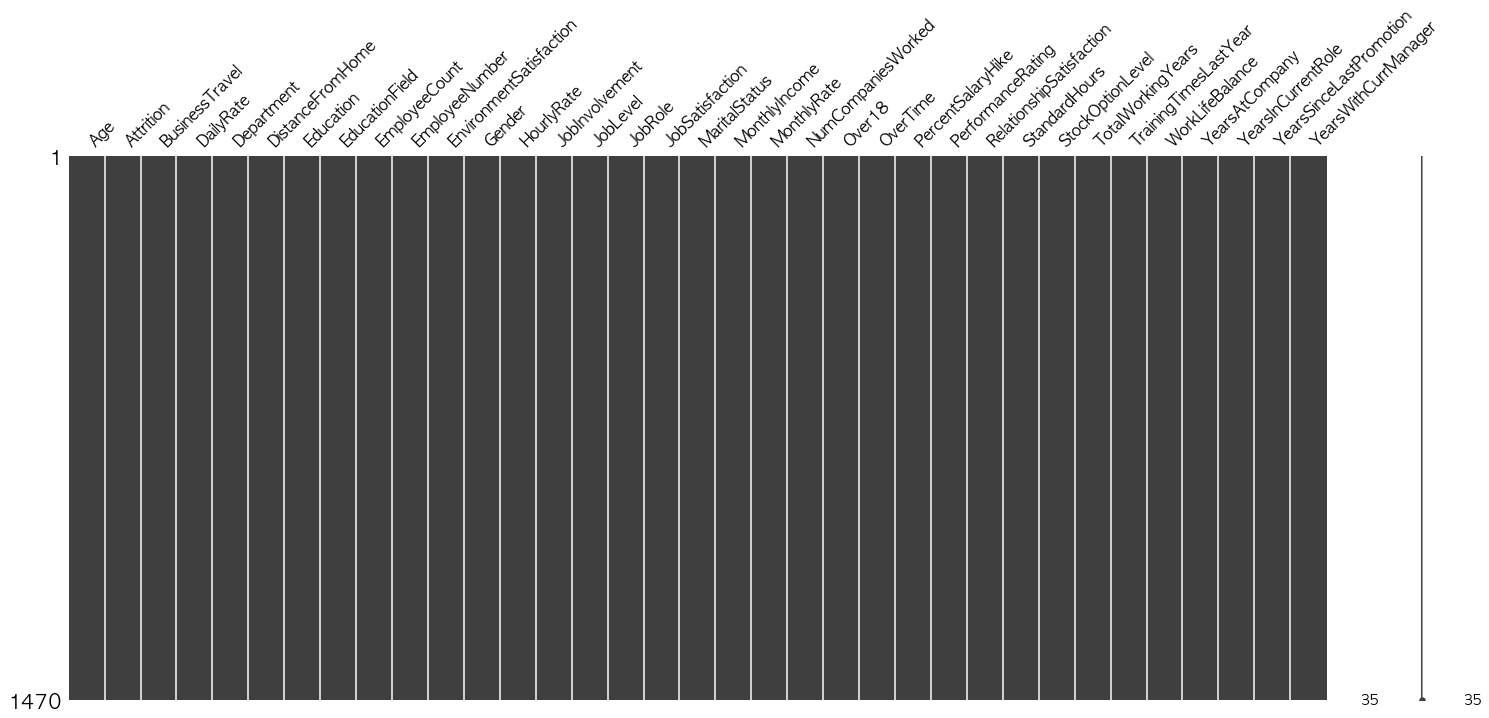

In [16]:
missingno.matrix(data)
plt.show()

- Missingno 패키지를 통해 Null 데이터가 있는지 시각화 해보았습니다.
- 총 1470 데이터 중에 Null 데이터는 없는것으로 확인됩니다.
- 만일 있다면 중간값, 삭제, 평균 값 등으로 채워주거나 혹은 해당 데이터 행 자체를 삭제 해야합니다.
- 만일 Null data를 임의적으로 0혹은 999와 같이 일괄적인 값으로 채워넣었다면 여기서 확인은 어렵습니다.

<br>

## 2. EDA
---
### 2.1 가설 설정 - 누가 퇴사를 할것인가?
- 일단 퇴사를 할것 같은 사람들 간단한 도메인 지식을 활용하여 가설설정하였음.
- 가설1 : 집과 회사의 거리가 먼 사람들이 퇴사를 많이 할것이다.
- 가설2 : 월급여가 낮은 사람이 퇴사를 많이 할것이다.
- 가설3 : 업무환경이 안좋은 사람이 퇴사를 할것이다.
- 가설4 : 워라벨이 안좋은 사람들이 퇴사를 할것이다.
- 가설5 : 근무부서에 따른 퇴사의 비율이 다를것이다. 즉, 특정부서가 퇴사율이 높을것이다.
- 가설6 : 초기 경력자들이 퇴직을 많이 할것이다.

<br>

### 2.2 Target 확인

In [17]:
print('Attrition 비율')
print(f'{data.Attrition.value_counts().index[0]} : {round(data.Attrition.value_counts()[0] / len(data), 2) * 100}%')
print(f'{data.Attrition.value_counts().index[1]} : {round(data.Attrition.value_counts()[1] / len(data), 2) * 100}%')

Attrition 비율
No : 84.0%
Yes : 16.0%


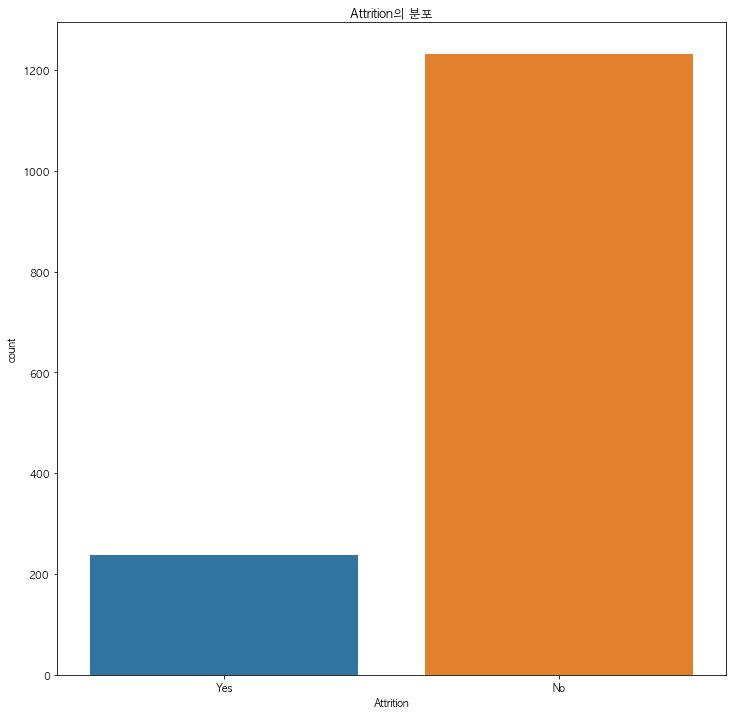

In [18]:
plt.figure(figsize = (12,12))
sns.countplot(x = data['Attrition'])
plt.title('Attrition의 분포')
plt.show()

- 퇴사자의 분포는 전체 데이터의 약 16%를 차지하는것을 알수 있었습니다.

<br>

### 2.3 전체 컬럼 분포 확인

#### 2.3.1 카테고리형 컬럼

In [22]:
# category column
cate_cols = []
for column in data.columns:
    if data[column].dtype == object:
        cate_cols.append(column)
        print('=============================================================================================')
        print(f'{column} : {data[column].unique()}')
        print(f'{data[column].value_counts()}')
        print()
        
print()
print(f'object column의 갯수 : {len(cate_cols)} 개')

Attrition : ['Yes' 'No']
No     1233
Yes     237
Name: Attrition, dtype: int64

BusinessTravel : ['Travel_Rarely' 'Travel_Frequently' 'Non-Travel']
Travel_Rarely        1043
Travel_Frequently     277
Non-Travel            150
Name: BusinessTravel, dtype: int64

Department : ['Sales' 'Research & Development' 'Human Resources']
Research & Development    961
Sales                     446
Human Resources            63
Name: Department, dtype: int64

Education : ['College' 'Below College' 'Master' 'Bachelor' 'Doctor']
Bachelor         572
Master           398
College          282
Below College    170
Doctor            48
Name: Education, dtype: int64

EducationField : ['Life Sciences' 'Other' 'Medical' 'Marketing' 'Technical Degree'
 'Human Resources']
Life Sciences       606
Medical             464
Marketing           159
Technical Degree    132
Other                82
Human Resources      27
Name: EducationField, dtype: int64

EnvironmentSatisfaction : ['Medium' 'High' 'Very High' 'Low']


- 총 19개의 Category형 컬럼의 값들을 확인해 보았습니다.
- 그중 Over18 컬럼이 Y값 하나만을 가지고 있을것을 알수 있었으며, 그 외 다른 컬럼은 큰 이상이 없어 보입니다.

<br>

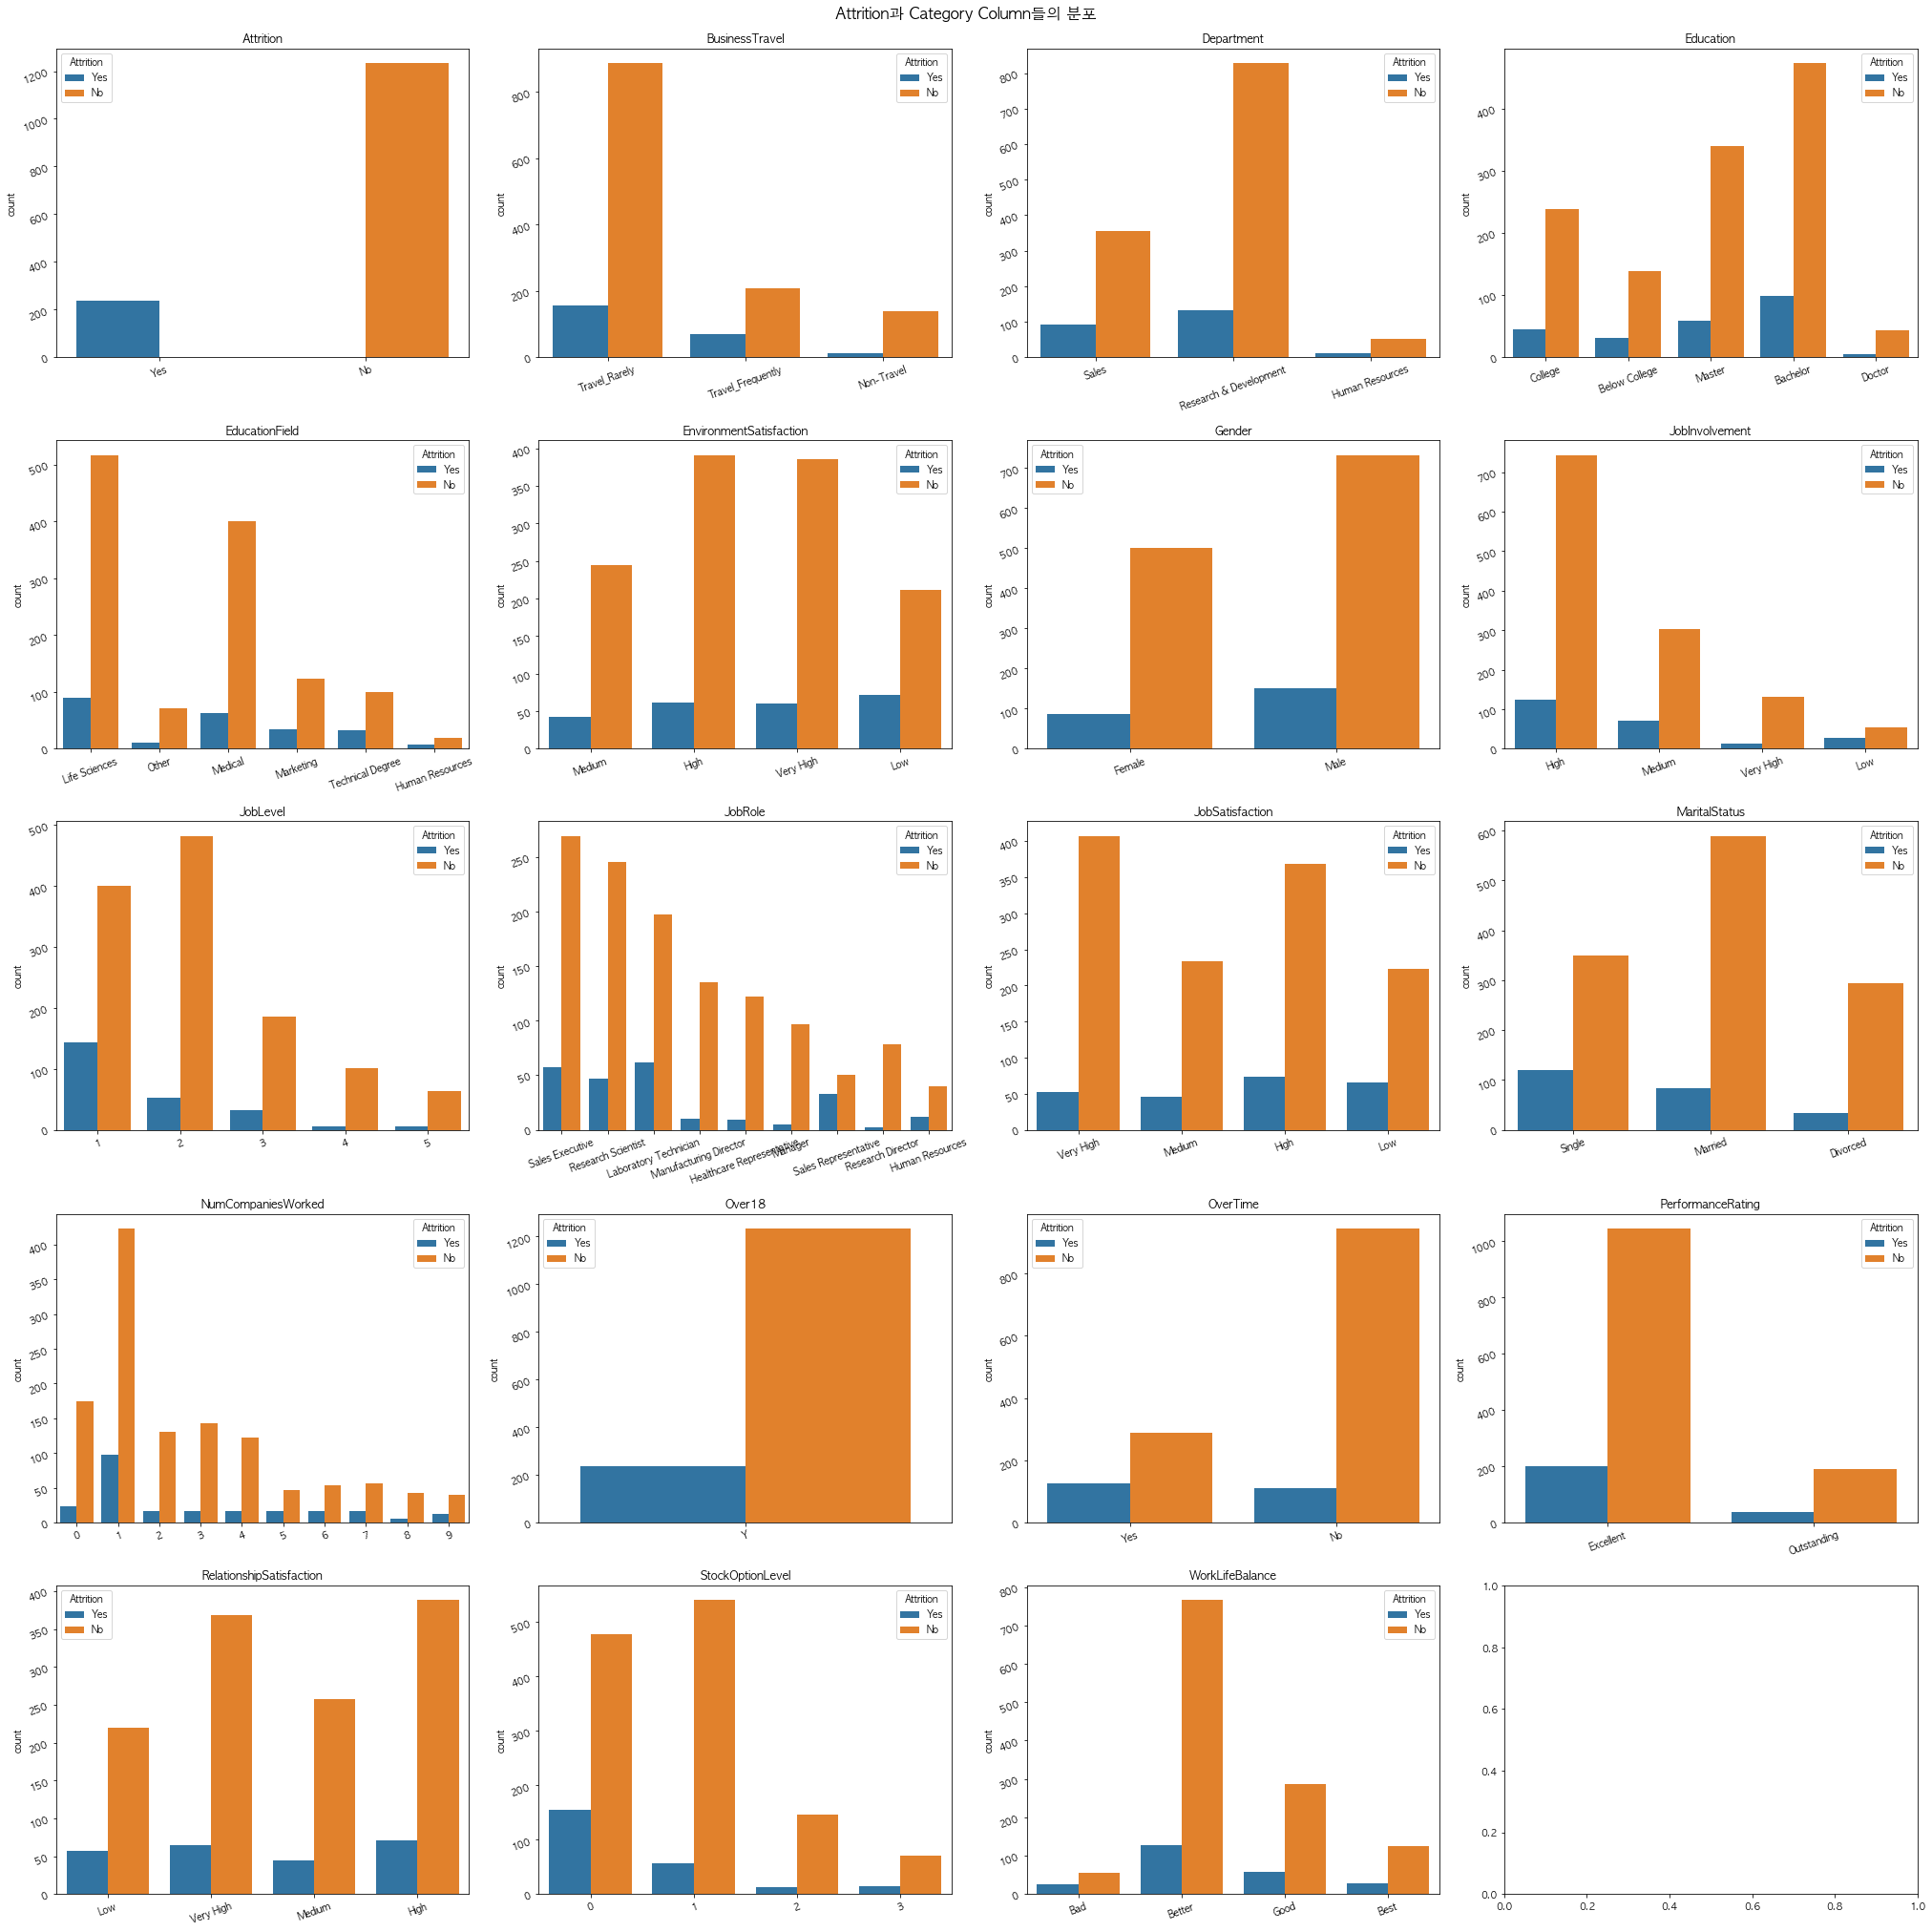

In [24]:
# category column 그래프로 보기
fig, ax = plt.subplots(5, 4, figsize=(28, 28), constrained_layout=True)
ax = ax.flatten()
fig.suptitle('Attrition과 Category Column들의 분포', fontsize=16)

for i in range(len(cate_cols)):
    sns.countplot(x=cate_cols[i], data=data,
                      hue='Attrition', ax=ax[i]).set(xlabel = None)
    ax[i].set(title = cate_cols[i])
    
    if data[cate_cols[1]].nunique() >= 3:
        ax[i].tick_params(labelrotation=20)
        
plt.show()

- 요약 데이터를 그래프로 시각화 해보았습니다.
- Department(근무부서) : 근무부서에 따라 퇴사 여부가 달라짐이 보입니다. 일단 눈으로 볼땐 HR부서가 가장 적어보이지만, 모수가 적기 때문에 자세히 확인해볼 필요가 있습니다.
- EnvironmentSatisfaction(근무환경 만족도) : 근무환경 만족도에 따라서 퇴사 여부가 확인될듯 싶었는데, 아래에서 자세히 확인해봐야할듯 싶습니다.
- JobSatisfaction(직업 만족도) : 직업 만족에 따른 퇴사 여부도 확인해 보아야겠습니다.
- StockOptionLevel(스톡옵션 레벨) : 스톡옵션이 없거나 낮은 직원이 많이 떠나는것으로 보입니다. 확인해볼 필요가 있어 보입니다.
- WorkLifeBalance(워라벨의 정도) : 워라벨이 중요한 사람들은 퇴사를 많이하는지 확인이 필요합니다. 만일 그렇다면 해당 회사는 워라벨이 좋지 않은 회사 인듯 합니다.

<br>

#### 2.3.2 연속형 컬럼 확인

In [25]:
# continuous column
cont_cols = []
for column in data.columns:
    if data[column].dtype != object:
        cont_cols.append(column)
        print(f'{column} : {data[column].nunique()}')
        print('==============================')
print()
print(f'연속형 column의 갯수 : {len(cont_cols)} 개')

Age : 43
DailyRate : 886
DistanceFromHome : 29
EmployeeCount : 1
EmployeeNumber : 1470
HourlyRate : 71
MonthlyIncome : 1349
MonthlyRate : 1427
PercentSalaryHike : 15
StandardHours : 1
TotalWorkingYears : 40
TrainingTimesLastYear : 7
YearsAtCompany : 37
YearsInCurrentRole : 19
YearsSinceLastPromotion : 16
YearsWithCurrManager : 18

연속형 column의 갯수 : 16 개


- int형 컬럼을 요약해보니, EmployeeCount, StandardHours는 값이 1개로 되어 있어서, 삭제가 필요합니다.
- EmployeeNumber는 값이 1470개로 모든 Row마다 값이 유니크함으로, 삭제가 필요합니다.
- 눈으로 쉽게 보기 위해 그래프로 그려보겠습니다.

<br>

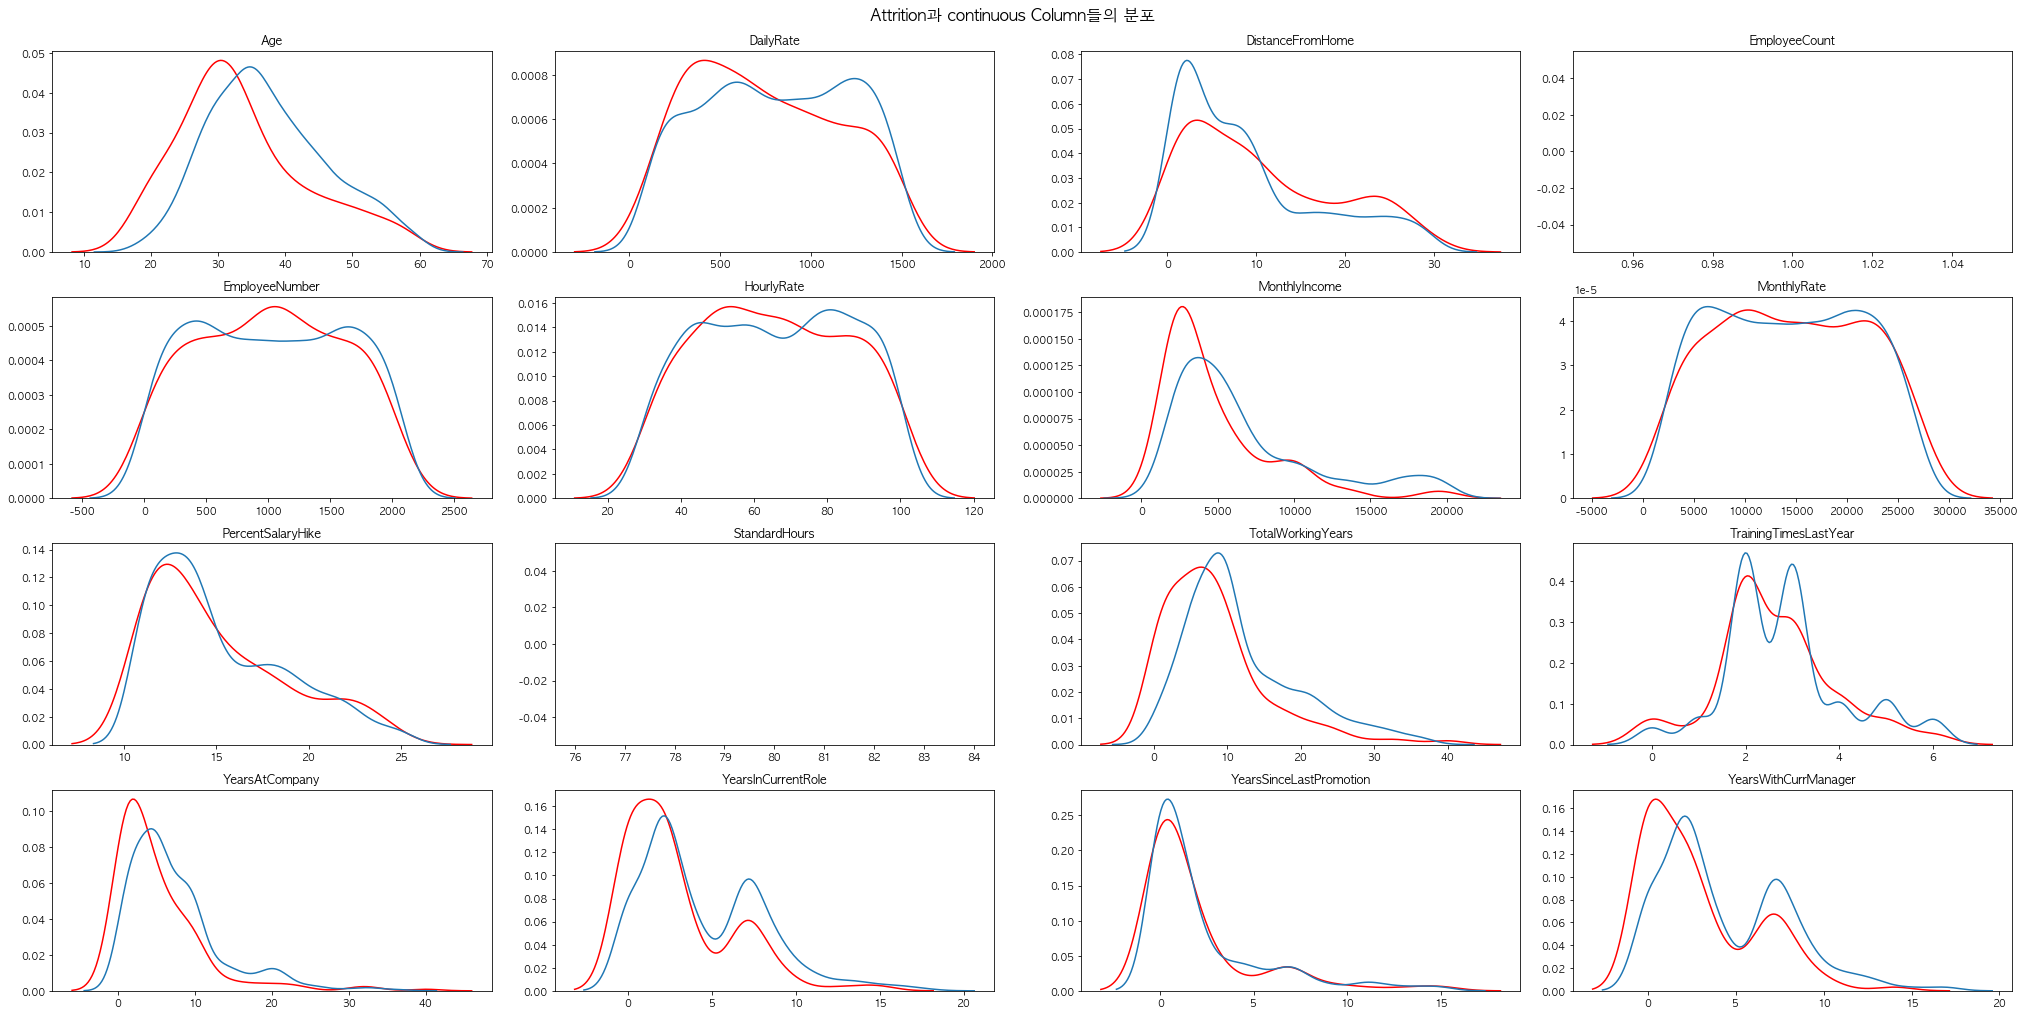

In [27]:
fig, ax = plt.subplots(4, 4, figsize=(28, 14), constrained_layout=True)
ax = ax.flatten()
fig.suptitle('Attrition과 continuous Column들의 분포', fontsize=16)

for i in range(len(cont_cols)):
    sns.distplot(data[data['Attrition'] == 'Yes'][cont_cols[i]], color='Red', ax=ax[i], hist = False).set(xlabel = None, ylabel = None)
    sns.distplot(data[data['Attrition'] == 'No'][cont_cols[i]], ax=ax[i],hist = False).set(xlabel = None, ylabel = None)
    ax[i].set(title = cont_cols[i])
    
plt.show()

- 밀도 그래프를 그려보았습니다. 빨간색은 퇴사한 사람들에 대한 그래프이고 파란색은 반대입니다.
- 밀도 그래프만으로는 부족해보여 박스그래프도 그려보겠습니다.

<br>

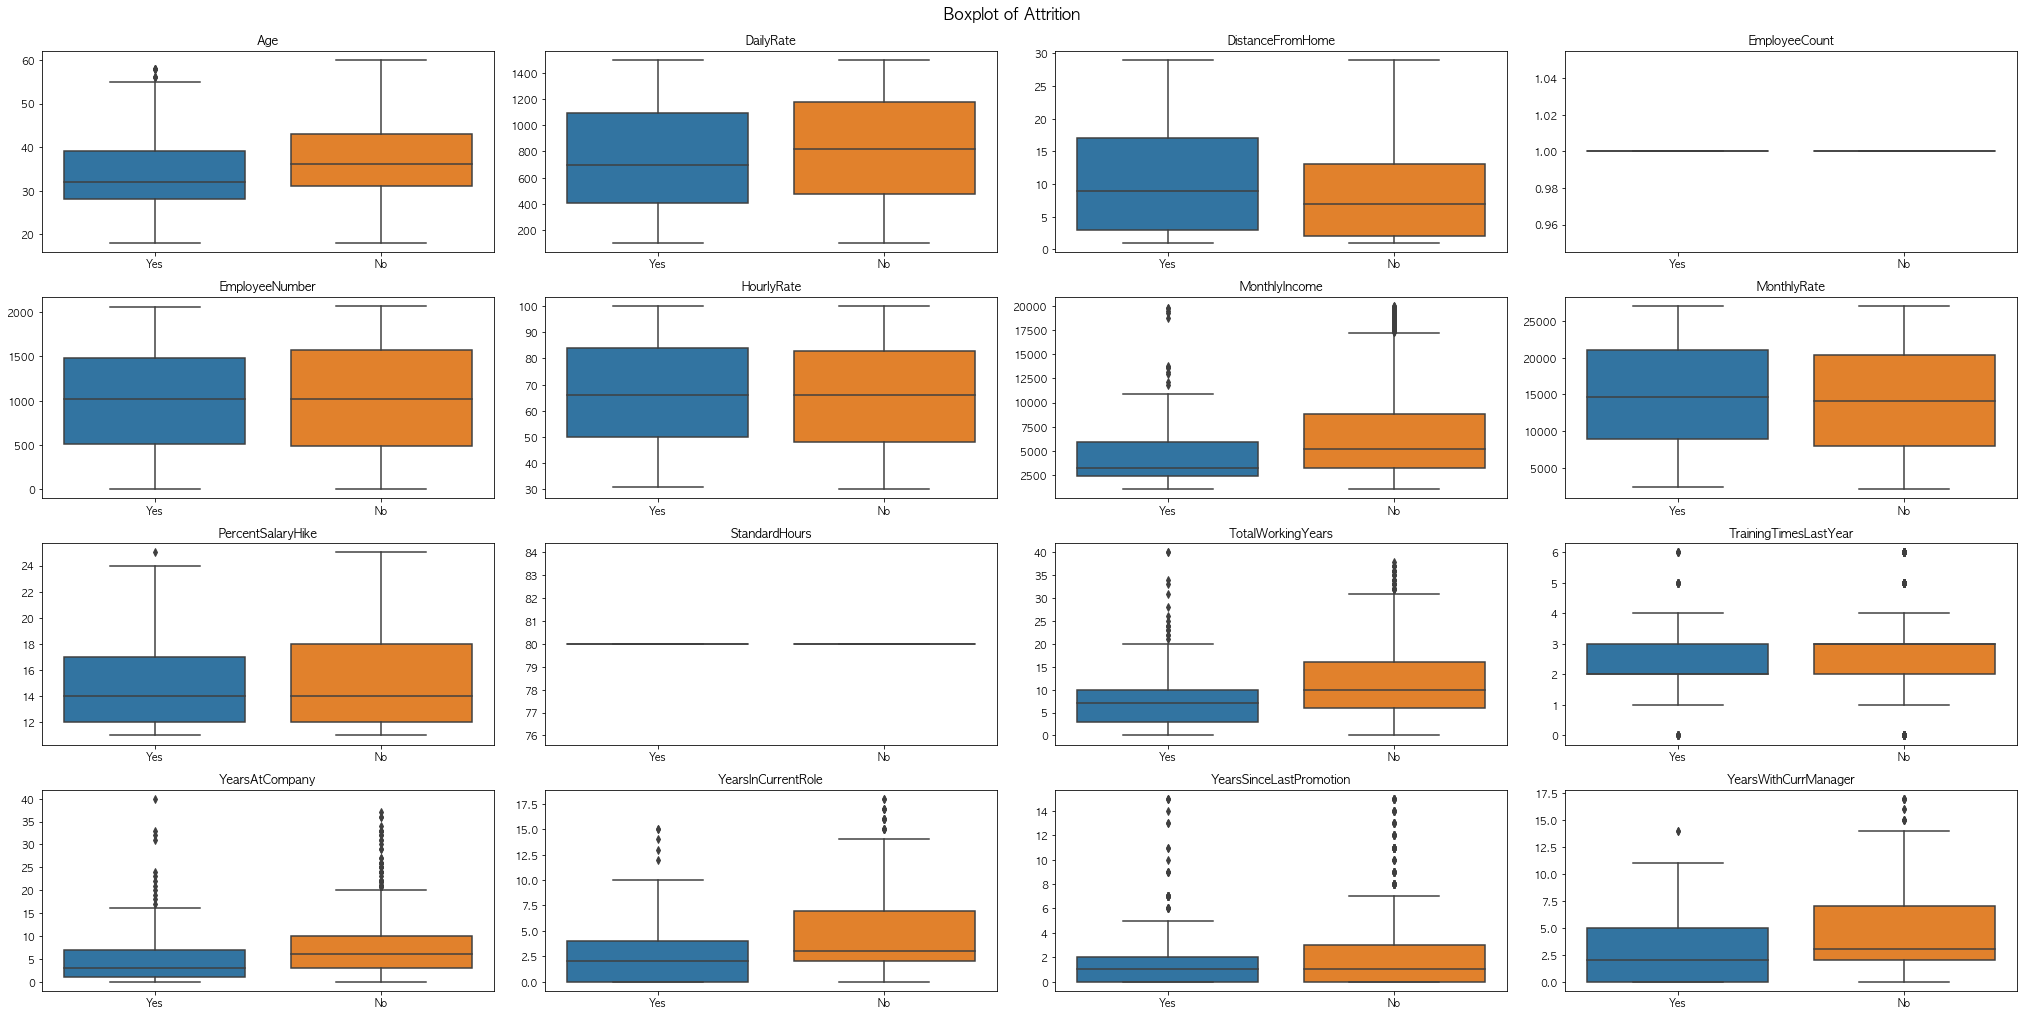

In [28]:
# boxplot
fig, ax = plt.subplots(4, 4, figsize=(28, 14), constrained_layout=True)
ax = ax.flatten()
fig.suptitle('Boxplot of Attrition', fontsize=16)

for i in range(len(cont_cols)):
    ax[i].set(title = cont_cols[i])
    sns.boxplot(x=data['Attrition'], y = data[cont_cols[i]], ax=ax[i]).set(xlabel=None,  ylabel=None)
    
plt.show()

- int형 컬럼에 대해 밀도 그래프와 박스 그래프를 그려보니 이상한 컬럼이 눈에 확실히 띕니다.(위에서 이야기했던 3가지 컬럼)
- Age (나이) : 나이가 어릴때 퇴사를 많이하는것으로 보입니다.
- MonthlyIncome (월수입) : 월 급여가 적으면 퇴사합니다. 많아도 퇴사를 하는 극단치가 보입니다.
- DistanceFromHome (집과 회사의 거리) : 집과 거리가 멀면 퇴사를 하는 경향이 보입니다.
- YearsInCurrentRole (현재 역할의 연수) : 장기간 같은 역할을 할때 그대로 있고, 초창기에 퇴직을 많이 합니다. 이는 승진을 하고 퇴사를 한다는 이야기 같습니다.
- PercentSalaryHike (연봉 상승률) : 연봉 상승률이 낮은 사람은들은 그렇지 않은 사람들에 비해 더 많이 퇴사하는것으로 봉비니다.
- YearsWithCurrManager (현재 관리자와 같이 일한 연도) : 관리자와 오래일하면 퇴직하진 않지만 중간에 퇴사하는 사람이 들쭉날쭉합니다. 진짜 관리자 때문에 퇴사를 하는 것일지 궁금합니다.
- TotalWorkingYears (총 경력) : 경력이 짧을때 퇴사를 많이 합니다. 경력이 많은 사람들이 퇴사를 하는것으로 보이는데, 아마 정년퇴임이 아닐까 싶긴 합니다.

<br>

### 2.4 컬럼 삭제

In [29]:
# EmployeeCount, StandardHours, Over18, EmployeeNumber 
print('Over18 :', data['Over18'].unique()[0])
print('EmployeeCount :', data['EmployeeCount'].unique()[0])
print('StandardHours :', data['StandardHours'].unique()[0])
print('EmployeeNumber :', data['EmployeeNumber'].unique()[0])
data.drop(['EmployeeCount', 'StandardHours', 'Over18', 'EmployeeNumber'], axis = 1, inplace = True)
print(data.shape)
data.tail()

Over18 : Y
EmployeeCount : 1
StandardHours : 80
EmployeeNumber : 1
(1470, 31)


,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
1465,36,No,Travel_Frequently,884,Research & Development,23,College,Medical,High,Male,41,Very High,2,Laboratory Technician,Very High,Married,2571,12290,4,No,17,Excellent,High,1,17,3,Better,5,2,0,3
1466,39,No,Travel_Rarely,613,Research & Development,6,Below College,Medical,Very High,Male,42,Medium,3,Healthcare Representative,Low,Married,9991,21457,4,No,15,Excellent,Low,1,9,5,Better,7,7,1,7
1467,27,No,Travel_Rarely,155,Research & Development,4,Bachelor,Life Sciences,Medium,Male,87,Very High,2,Manufacturing Director,Medium,Married,6142,5174,1,Yes,20,Outstanding,Medium,1,6,0,Better,6,2,0,3
1468,49,No,Travel_Frequently,1023,Sales,2,Bachelor,Medical,Very High,Male,63,Medium,2,Sales Executive,Medium,Married,5390,13243,2,No,14,Excellent,Very High,0,17,3,Good,9,6,0,8
1469,34,No,Travel_Rarely,628,Research & Development,8,Bachelor,Medical,Medium,Male,82,Very High,2,Laboratory Technician,High,Married,4404,10228,2,No,12,Excellent,Low,0,6,3,Best,4,3,1,2


- EmployeeCount와 EmployeeNumber는 1, StandardHours는 80, Over18은 Y로 각각 하나의 값만 가지므로 분석 및 예측에 필요 없기에 삭제하였습니다.

<br>

### 2.5 상관관계

In [30]:
# 상관계수 구하기
data_cp = data.copy()
data_cp = pd.get_dummies(data_cp, drop_first= True)
data_cp = data_cp[['Attrition_Yes'] + [column for column in data_cp.columns if column != 'Attrition_Yes']]
data_corr = data_cp.corr()
print(data_corr.shape)

(71, 71)


#### 2.5.1 상관계수 히트맵으로 확인

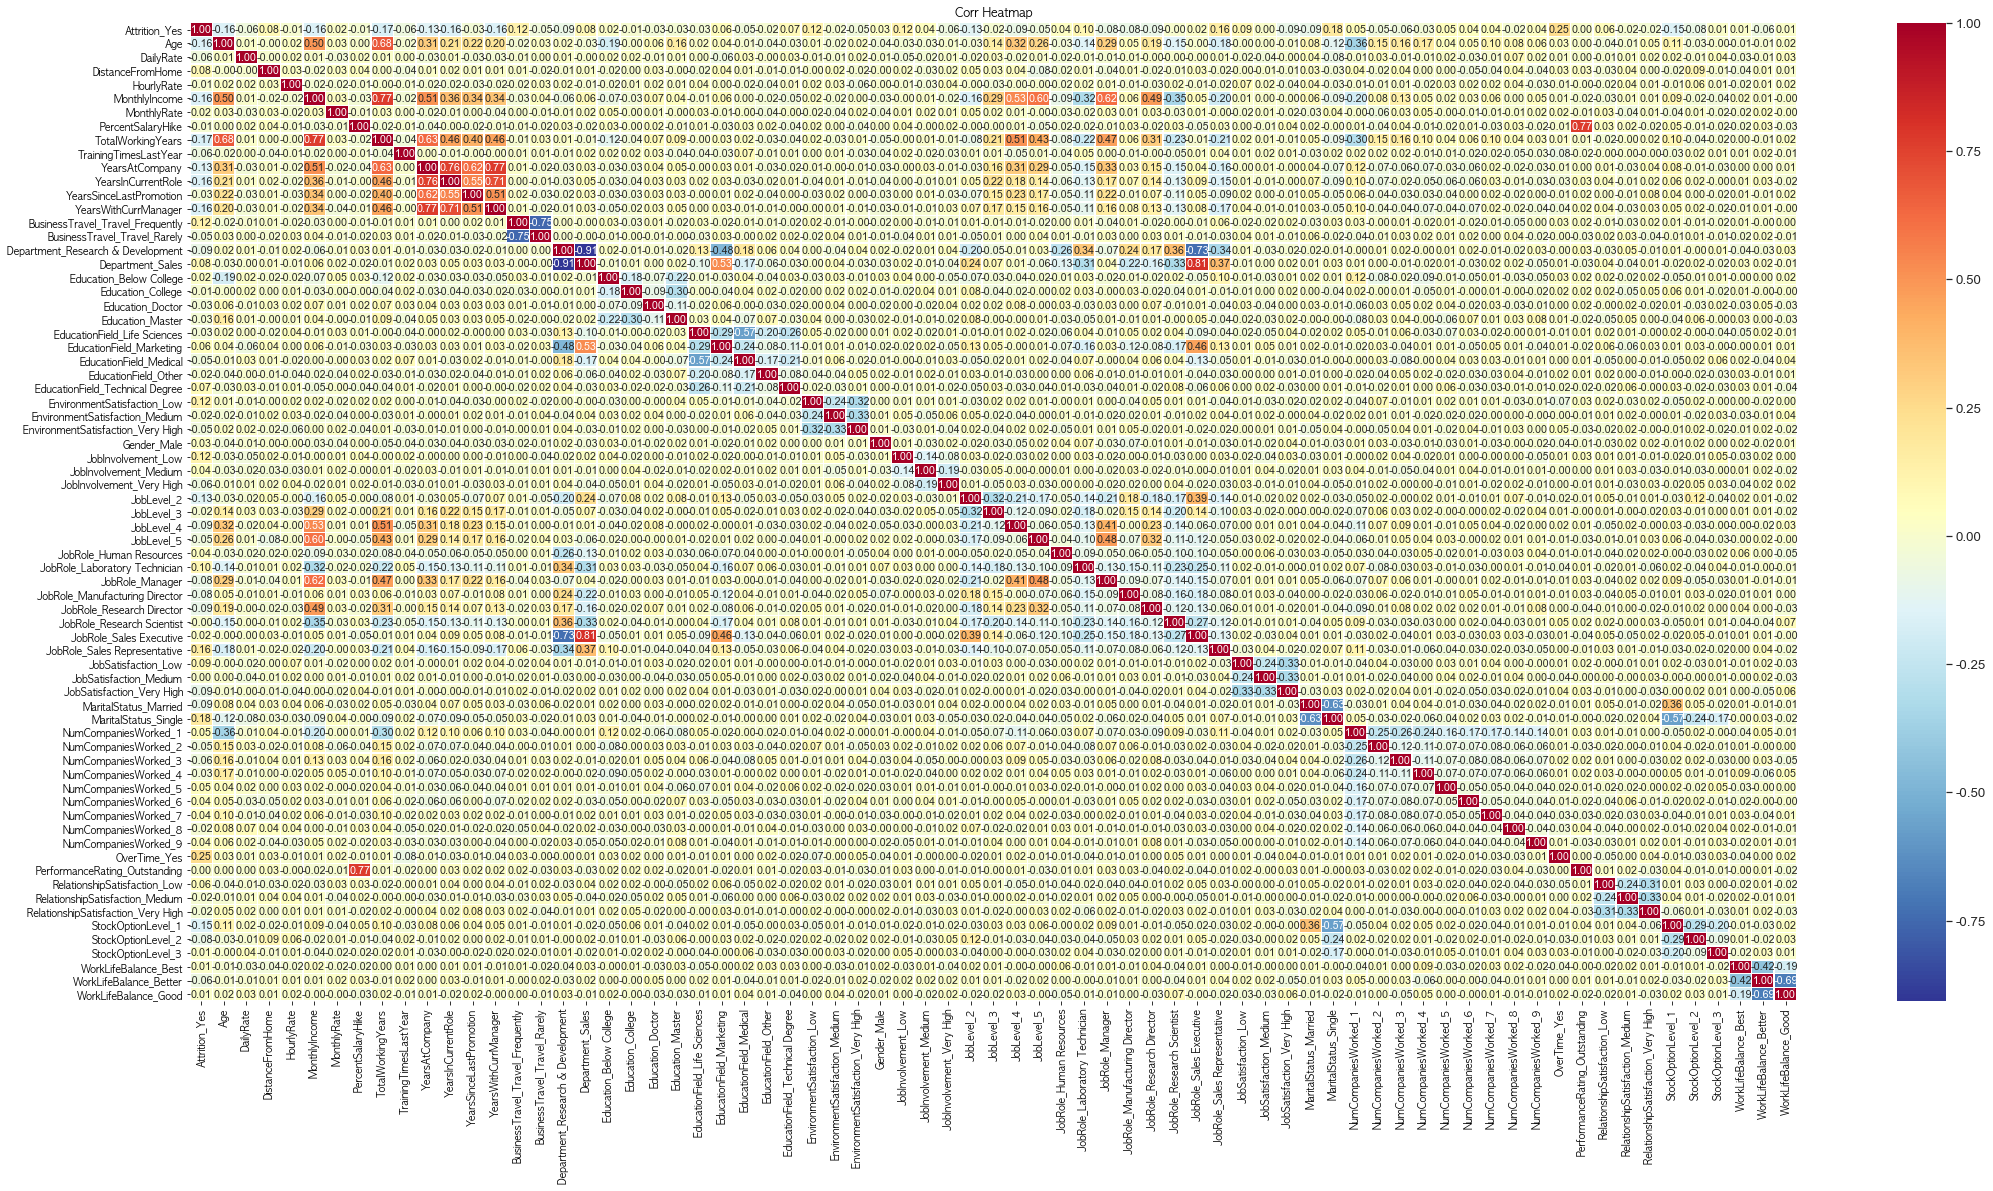

In [31]:
plt.figure(figsize=(36, 18))
plt.title('Corr Heatmap')

# 실제 히트맵 그리는 코드
sns.set(font_scale=1.2)
sns.heatmap(data_corr, annot=True, annot_kws={
    "size": 90 / np.sqrt(len(data_corr))}, fmt='.2f', cmap='RdYlBu_r', linewidths=0.5,)
plt.savefig('corrmap.png')
plt.show()

- 변수가 너무많아서 상관계수를 히트맵으로 표현해도 잘 볼수가 없습니다.
- 물론 볼수는 있지만, 이럴땐 다른 방법으로 확인해야겠습니다.

<br>

#### 2.5.2 상관관계가 있는것들만 따로 보기

In [32]:
temps = data_corr[(data_corr > 0.4) | (data_corr < -0.4)]
high_corr = []
for c in temps.columns: 
    temp = temps[c].dropna()

    if len(temp) == 1:
        continue
    high_corr.append([temp.name, temp.to_dict()])

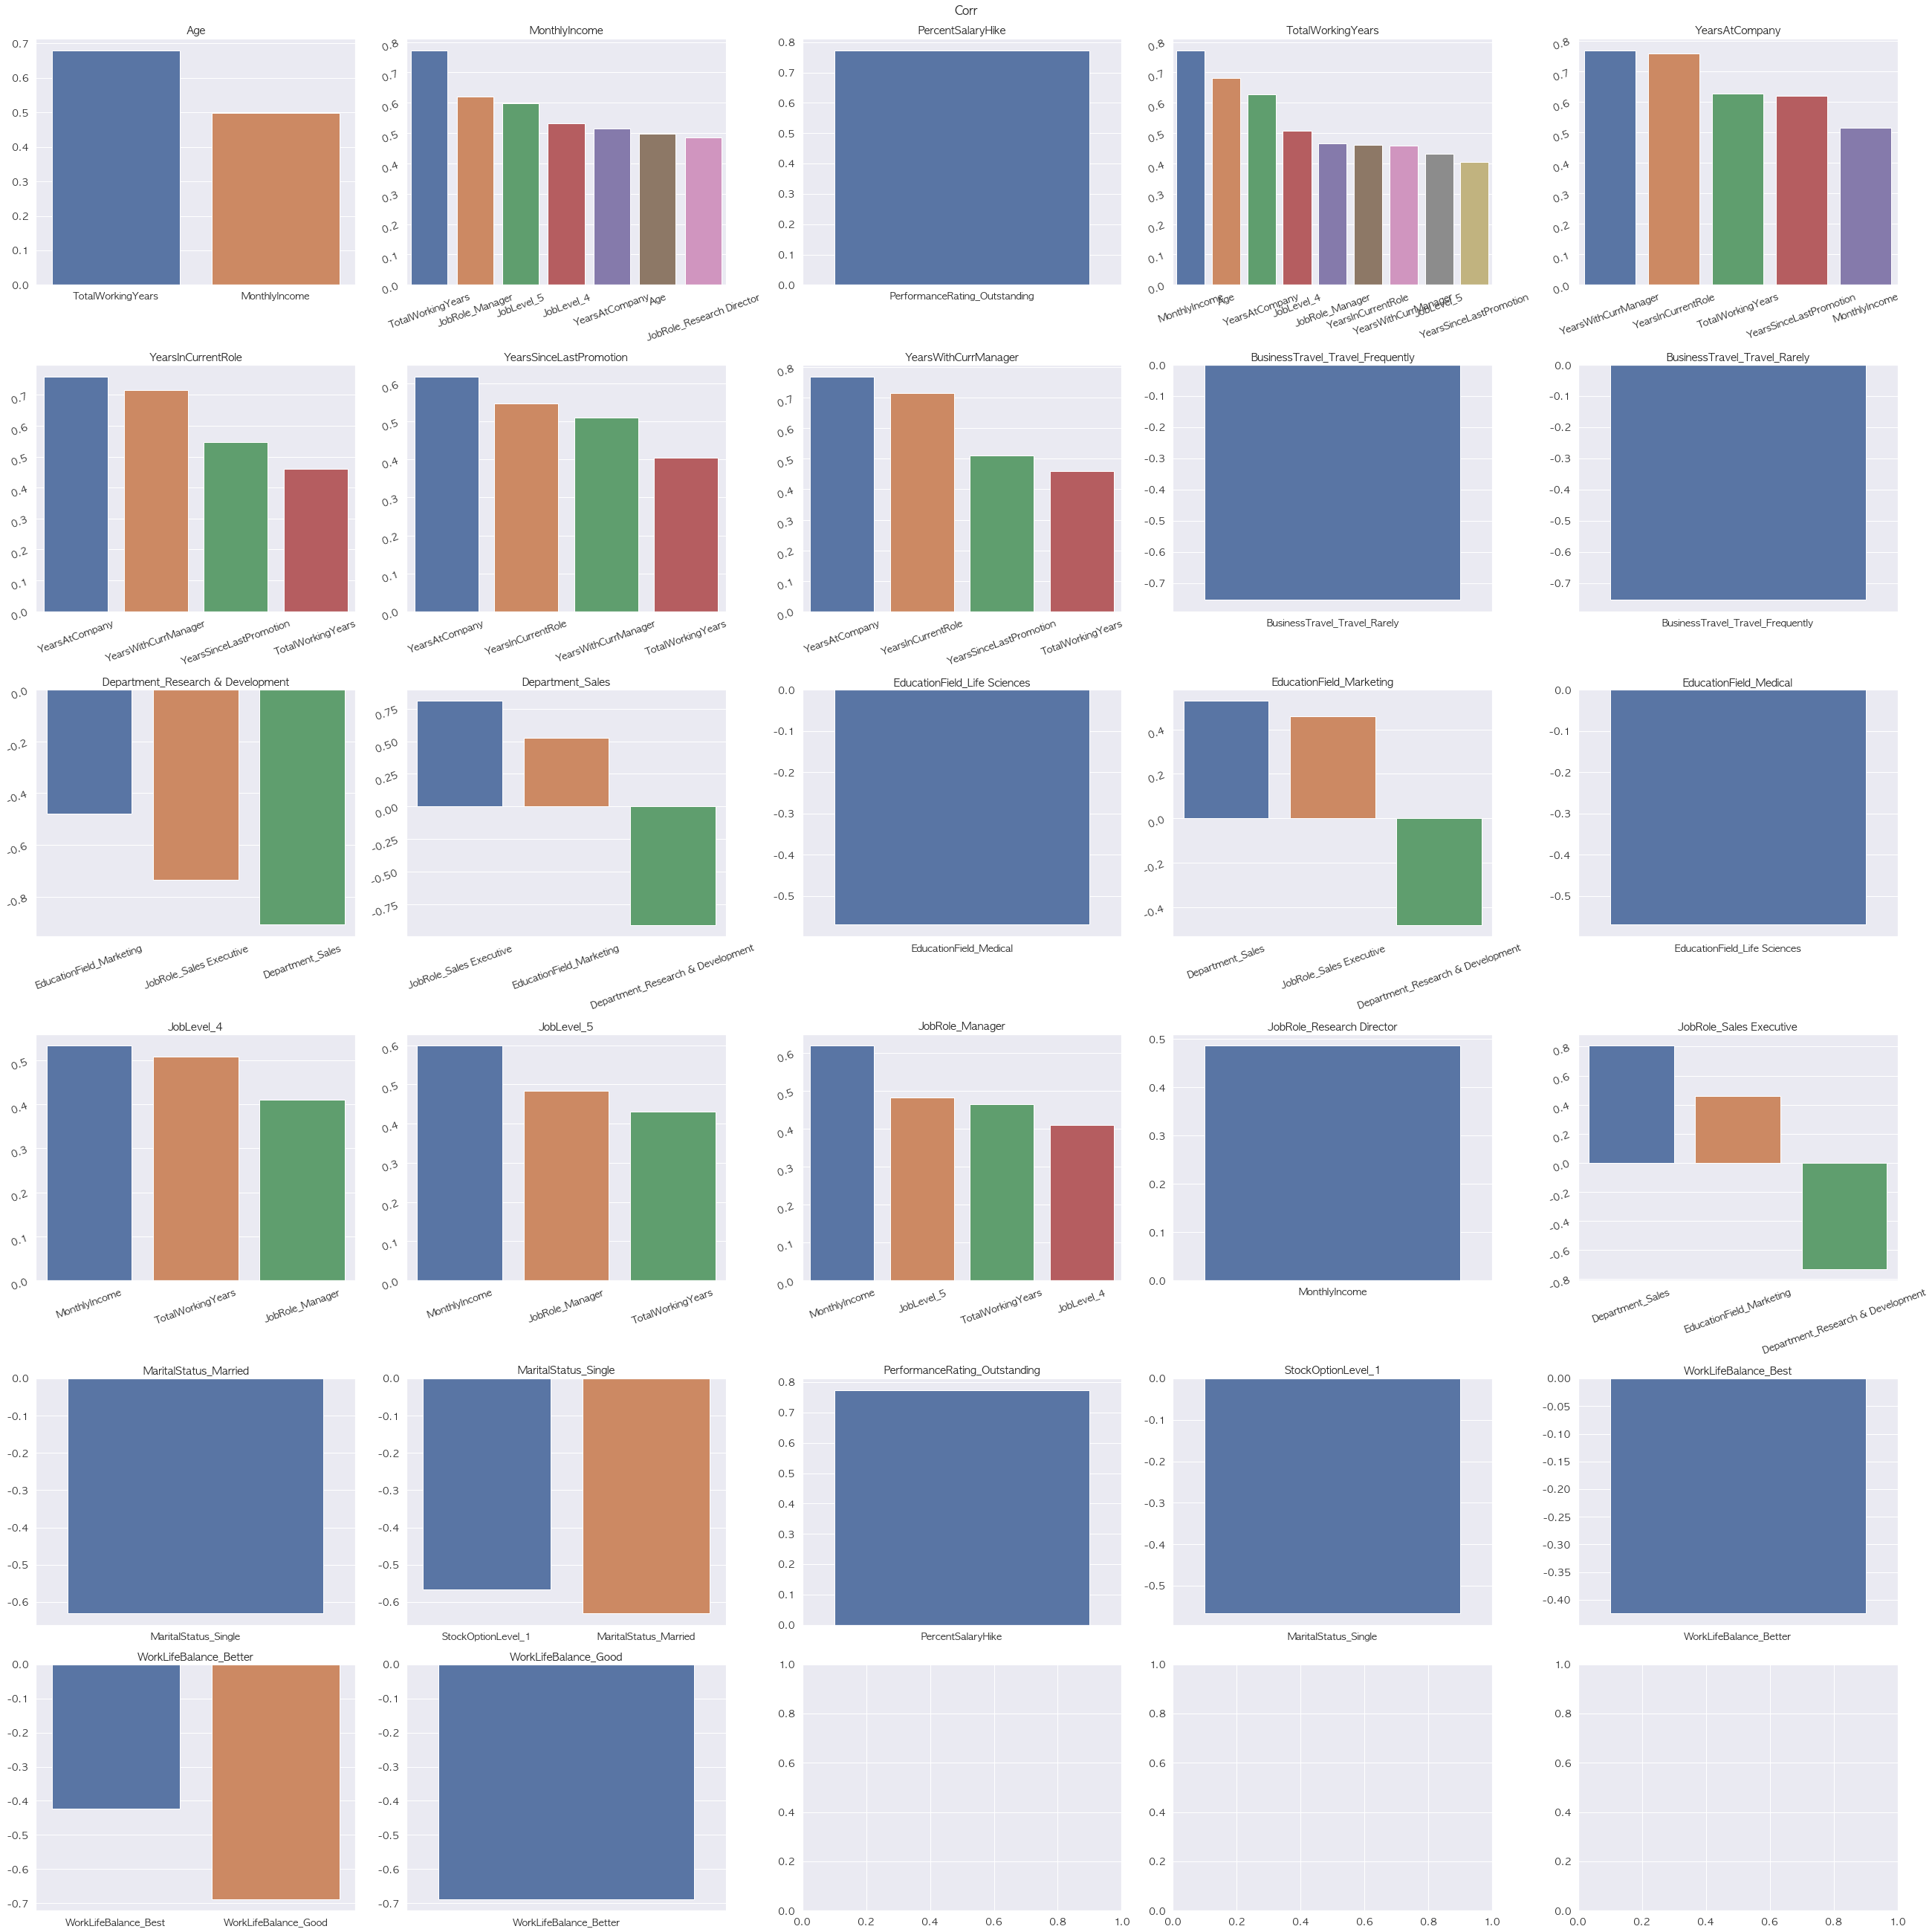

In [35]:
fig, ax = plt.subplots(6,5, figsize = (36, 36), constrained_layout=True)
fig.suptitle('Corr', fontsize=16)
ax = ax.flatten()

for i, c in enumerate(high_corr):
    ordered_d = OrderedDict(sorted(high_corr[i][1].items(), key=lambda t:t[1], reverse=True))
    title = ordered_d.popitem(0)
    
    sns.barplot(x = list(ordered_d.keys()), y = list(ordered_d.values()), ax = ax[i])
    ax[i].set(title = title[0])
    
    if len(ordered_d.keys()) > 2:
        ax[i].tick_params(labelrotation=20)
plt.savefig('corrbar.png')
plt.show()

- 월급여, 경력, 업무의 수준, 관리자, 나이에 상관계수가 높았습니다., 아무래도 경력이 쌓이고, 관리자의 직급, 어려운 업무일수록 급여를 많이주는것으로 파악됩니다.
- 만일 퇴사의 여부가 월 급여와 관련이 있다면 경력, 업무의 수준, 나이 등이 급여와 상관관계가 있으므로 같이 보아야 할듯 합니다.

<br>

#### 2.5.3 종속변수와의 상관관계

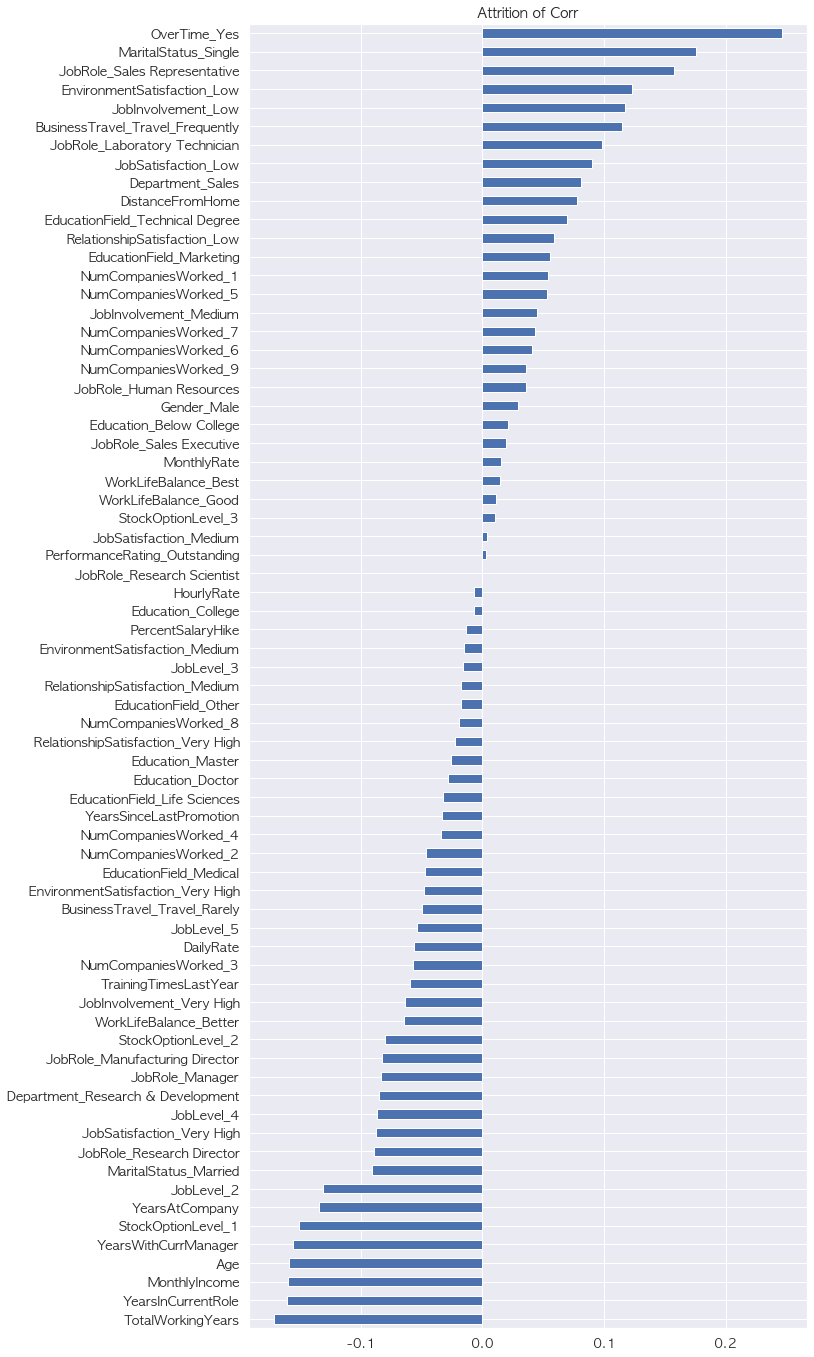

In [36]:
# 잘안보여서 일단 종속변수 상관관계만 확인
plt.title('Attrition of Corr')
data_cp.drop('Attrition_Yes', axis = 1).corrwith(data_cp.Attrition_Yes).sort_values().plot(kind='barh', figsize = (10, 24))
plt.show()

- 위에서 확인해보았던 히트맵에서는 종속변수는 다른 독립변수들과 비교하여 강한 상관관계를 가지는 변수는 없었습니다.
- 그래서 따로 확인을 해보았는데, 약하게 나마 OverTime, TotalWorkingYea, MonthlyIncome과 관계가 있어 보입니다.

<br>

### 2.6 가설 확인
- 가설1) 집과 회사의 거리가 먼 사람들이 퇴사를 많이 할것이다.
- 가설2) 월급여가 낮은 사람이 퇴사를 많이 할것이다.
- 가설3) 업무환경이 안좋은 사람이 퇴사를 할것이다.
- 가설4) 워라벨이 안좋은 사람들이 퇴사를 할것이다.
- 가설5) 근무부서에 따른 퇴사의 비율이 다를것이다. 즉, 특정부서가 퇴사율이 높을것이다.

<br>

In [37]:
# 비율 확인할 pivot 테이블 만드는 함수
def make_pivot(data, x, y, func):
    table = pd.pivot_table(data = data, values = 'Age', index = x, columns= y, aggfunc=func)
    table['total'] = table['No'] + table['Yes']
    table['Attrition_rate'] = table['Yes'] / table['total'] * 100
    return table

#### 2.6.1 가설1) 집과 회사의 거리가 먼 사람들이 퇴사를 많이 할것이다.

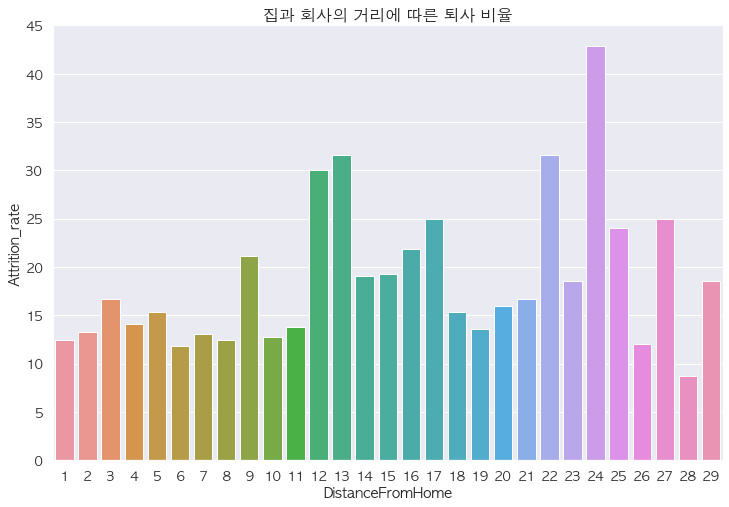

In [38]:
rate = make_pivot(data, 'DistanceFromHome', 'Attrition', func=len)

plt.rc('font', family='AppleGothic') 
plt.figure(figsize=(12,8))
plt.title('집과 회사의 거리에 따른 퇴사 비율', fontsize=16)
sns.barplot(rate.index, rate.Attrition_rate)
plt.show()

- 확실히 집에서 먼 사람이 집에서 가까운 사람들보다 많이 퇴사를 합니다.
- 가장 높은 비율인 거리 24는 전체 28명중에, 12 퇴사하여 비율로는 42.8%이고 전체 퇴사인원의 5%를 차지합니다.
- 전체 퇴사인원중에서 집과의 거리가 가까운 사람의 비율이 제일 많지만, 사실 집과의 거리가 가까운 인원의 비율이 전체 비율에서 제일 많아서 그렇습니다.

<br>

#### 2.6.2 가설2) 월급여가 낮은 사람이 퇴사를 많이 할것이다.

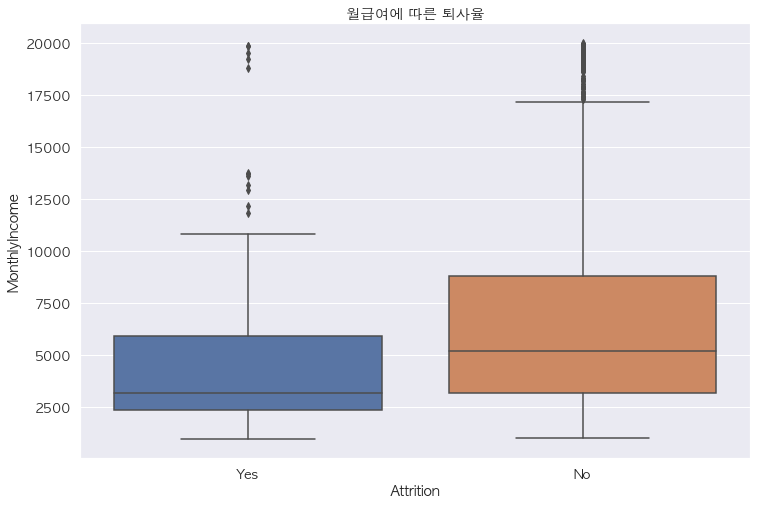

In [39]:
plt.figure(figsize = (12,8))
plt.title('월급여에 따른 퇴사율')
sns.boxplot(x = 'Attrition', y = 'MonthlyIncome', data = data)
plt.show()

- 박스그래프를 보면 월급여가 낮은 사람들이 퇴사가 있는것으로 보입니다.
- 또한 퇴사를 하지 않은 사람들의 중앙값이 퇴사를 한 사람들보다 위에 위치하고, 박스의 크기가 더 큰것으로 보아 분포도 넓은것으로 보입니다.
- 이는 월급여가 퇴사에 영향을 준다고 볼수 있다.

<br>

#### 2.6.3 가설3) 업무환경이 안좋은 사람이 퇴사를 할것이다.

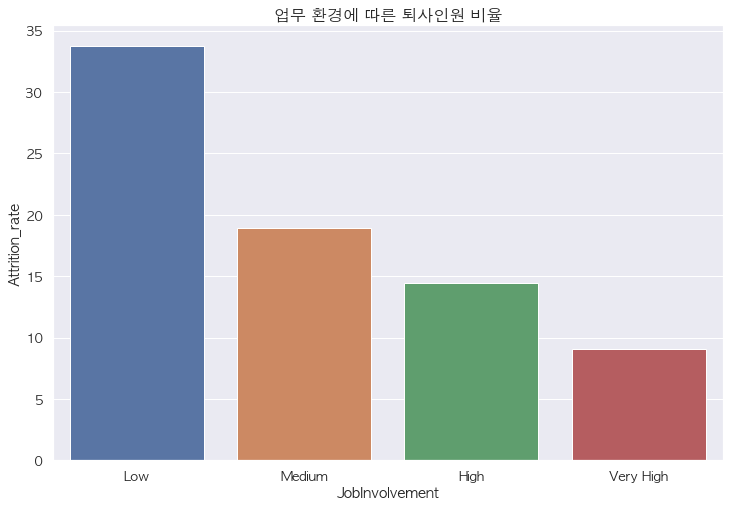

In [40]:
rate = make_pivot(data, 'JobInvolvement', 'Attrition', func=len)

plt.figure(figsize=(12, 8))
plt.title('업무 환경에 따른 퇴사인원 비율', fontsize=16)
sns.barplot(rate.index, rate.Attrition_rate, order=['Low', 'Medium', 'High', 'Very High'])
plt.show()

- 업무환경이 Low인 사람들은 총 83명이었고, 그 중 28명이 퇴사를 하였습니다. Low 인원의 비율로는 33%로 가장 높은 비율을 차지 합니다.
- 따라서 업무환경이 낮은 사람들이 더 많이 퇴사를 하는것으로 알수 있습니다.

<br>

#### 2.6.4 가설4) 워라벨이 안좋은 사람들이 퇴사를 할것이다.

In [42]:
rate

Attrition,No,Yes,total,Attrition_rate
WorkLifeBalance,,,,
Bad,55,25,80,31.250000
Best,126,27,153,17.647059
Better,766,127,893,14.221725
Good,286,58,344,16.860465


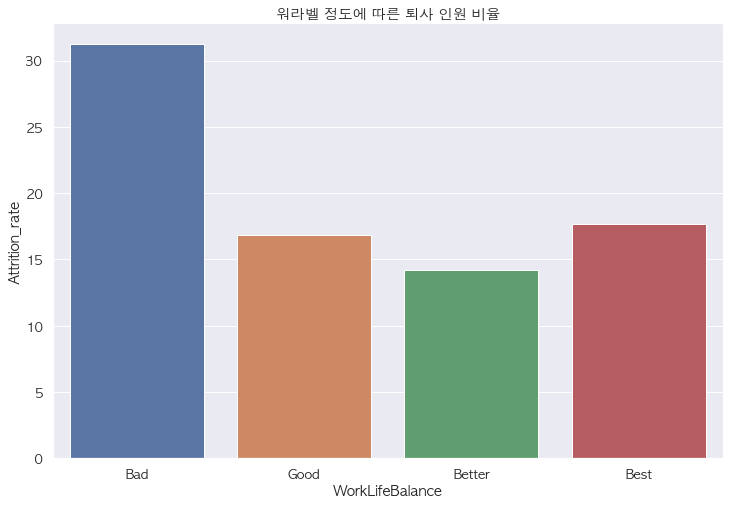

In [41]:
rate = make_pivot(data, 'WorkLifeBalance', 'Attrition', func= len)

plt.figure(figsize = (12,8))
plt.title('워라벨 정도에 따른 퇴사 인원 비율')
sns.barplot(rate.index, rate.Attrition_rate, order=['Bad', 'Good', 'Better', 'Best'])
plt.show()

- 워라벨이 Bad인 인원은 80명이고 그 중에 퇴사한 인원은 25명으로 총 비율로는 31%로 가장 높은 퇴사 비율을 보입니다.
- 의외인것은 Best인 인원도 꽤 많은 퇴사율을 보인다는 것입니다.
- 일단, 워라벨이 Bad인 사람들의 다른 사람들에 비해 퇴사율이 높습니다.

<br>

#### 2.6.5 가설5) 근무부서에 따른 퇴사의 비율이 다를것이다. 즉, 특정부서가 퇴사율이 높을것이다.

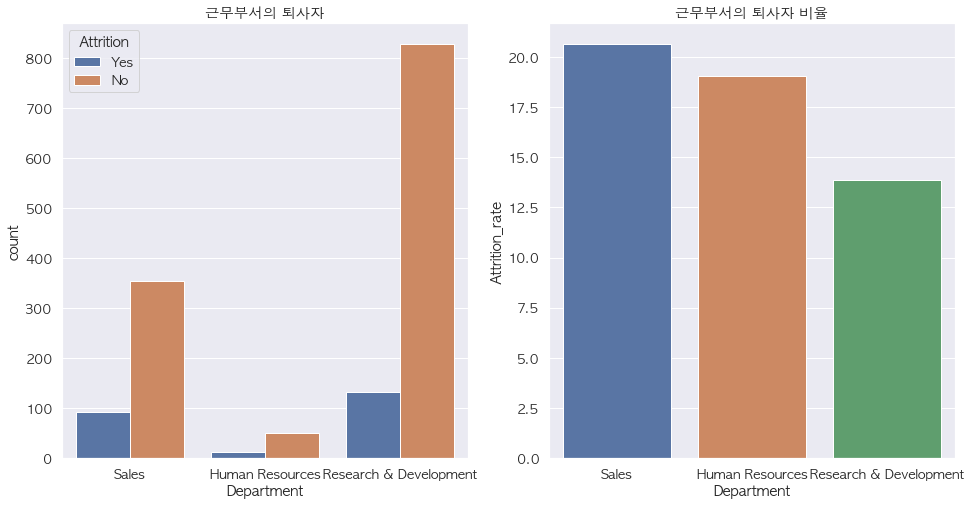

In [43]:
rate = make_pivot(data, 'Department', 'Attrition', func= len)
fig, ax = plt.subplots(1,2, figsize = (16,8))

sns.countplot(data['Department'], hue = data['Attrition'], ax = ax[0], order = ['Sales', 'Human Resources', 'Research & Development'])
ax[0].set(title = '근무부서의 퇴사자')

sns.barplot(rate.index, rate.Attrition_rate, ax = ax[1], order = ['Sales', 'Human Resources', 'Research & Development'])
ax[1].set(title = '근무부서의 퇴사자 비율')

plt.show()

- 근무부서가 HR인곳은 전체 인력도 많지 않은데, 퇴사자가 생각보다 많음을 알수 있다, HR에 근무하는 인원 대비 약 18%정도가 퇴사를 하였습니다.
- 그렇다면 근무부서별로 월수입의 차이가 나서 HR 부서에서 퇴사 인력이 많은것 일까?

<br>

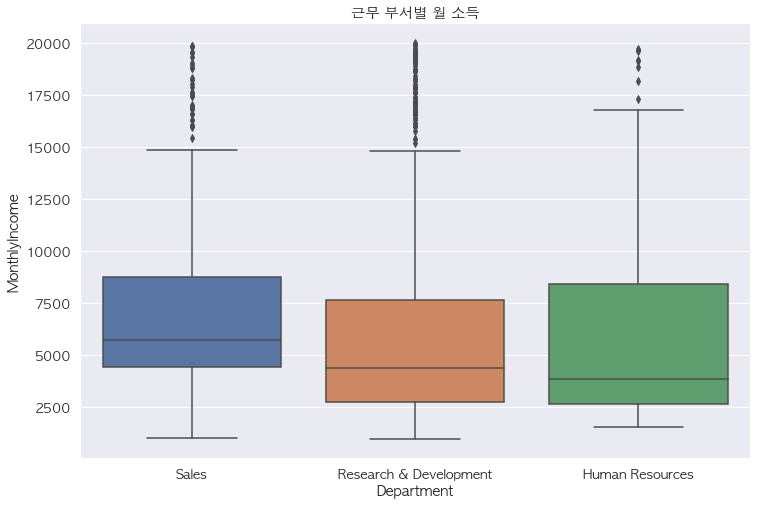

In [85]:
plt.figure(figsize=(12, 8))
plt.title('근무 부서별 월 소득')
sns.boxplot(x='Department', y='MonthlyIncome', data=data)
plt.show()

- 근무 부서별로 월 수입이 차이가 많이 나는지 확인을 해보았으나 (HR이 가장 낮을까?) 사실살 Sales를 제외하고는 나머지 2부서는 큰 차이가 없어 보입니다.
- 또한 가장 많은 월소득 구간은 세개의 부서는 큰 차이가 없는것으로 보입니다.
- 전체적으로 Sale의 급여가 조금 더 높게 형성되어 있음을 알수 있습니다.

<br>

In [44]:
temp = data.groupby('Department', axis=0).agg(['min', 'median', 'mean', 'max', 'std'])['MonthlyIncome']
temp

,min,median,mean,max,std
Department,,,,,
Human Resources,1555,3886.0,6654.507937,19717,5788.732921
Research & Development,1009,4374.0,6281.252862,19999,4895.835087
Sales,1052,5754.5,6959.172646,19847,4058.739322


- 혹시 몰라 부서별 월수입에 대한 간단한 통계요약치를 보았습니다.
- 위에 박스그래프에서 적은 내용과 큰 차이는 없습니다.

<br>

#### 2.6.6 가설6) 초기 경력자들이 퇴직을 많이 할것이다.

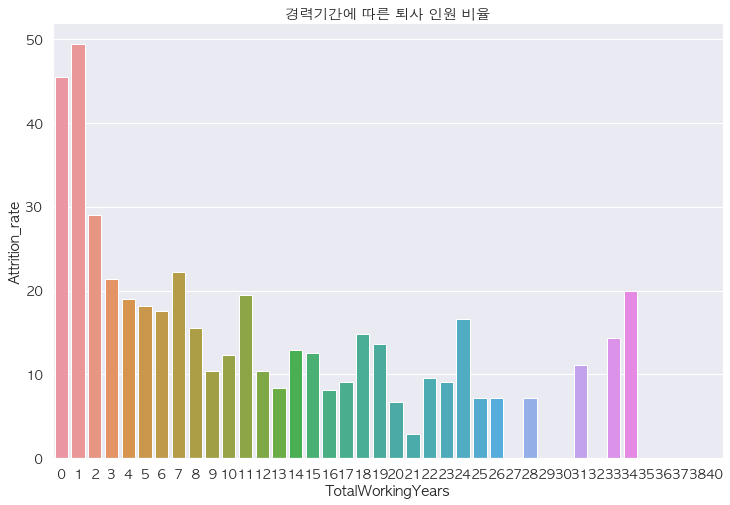

In [45]:
rate = make_pivot(data, 'TotalWorkingYears', 'Attrition', func= len).fillna(0)

plt.figure(figsize = (12,8))
plt.title('경력기간에 따른 퇴사 인원 비율')
sns.barplot(rate.index, rate.Attrition_rate)
plt.show()

- 예상대로 초기 경력자 (0년 ~ 2년사이)의 인원이 가장 많은 퇴직율을 보였습니다.
- 아마 처음 경력을 쌓고 다른곳으로 이직을 하기 위해 퇴사를 하는것이 아닐까 생각해 보았습니다.

<br>

#### 2.6.7 가설확인 결론
- 가설1) 집과 회사의 거리가 먼 사람들이 퇴사를 많이 할것이다. - 맞음
- 가설2) 월급여가 낮은 사람이 퇴사를 많이 할것이다. - 맞음
- 가설3) 업무환경이 안좋은 사람은 퇴사를 할것이다. - 맞음
- 가설4) 워라벨이 안좋은 사람들이 퇴사를 할것이다. - 맞음, 하지만 워라벨이 좋아도 퇴사를 함
- 가설5) 근무부서에 따른 퇴사의 비율이 다를것이다. 즉, 특정부서가 퇴사율이 높을것이다. - 틀림
- 가설6) 초기 경력자들이 퇴직을 많이 할것이다. - 맞음

<br>

## 3. 예측을 위한 데이터 처리
---

### 3.1 Label Encoder
- 컴퓨터는 Male, HR 이런 단어들을 인식하지 못합니다. 해당 단어들을 숫자로 바꿔주는것이 Label Encoder 입니다.
- 예를들어 Department의 'Sales', 'Human Resources', 'Research & Development' 를 컴퓨터가 알아볼수 있게 0, 1, 2로 바꿔주는 것입니다.

In [46]:
cate_cols = []
for column in data.columns:
    if data[column].dtype == object:
        cate_cols.append(column)

In [47]:
label_Encoder = LabelEncoder()
data[cate_cols] = data[cate_cols].apply(label_Encoder.fit_transform)

- data type이 object인것들을 모두 Label Encoding 해주었습니다.

<Br>

In [48]:
data.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,2,1102,2,1,2,1,2,0,94,0,1,7,3,2,5993,19479,8,1,11,0,1,0,8,0,0,6,4,0,5
1,49,0,1,279,1,8,1,1,0,1,61,2,1,6,2,1,5130,24907,1,0,23,1,3,1,10,3,2,10,7,1,7
2,37,1,2,1373,1,2,2,4,3,1,92,2,0,2,0,2,2090,2396,6,1,15,0,2,0,7,3,2,0,0,0,0
3,33,0,1,1392,1,3,4,1,3,0,56,0,0,6,0,1,2909,23159,1,1,11,0,0,0,8,3,2,8,7,3,0
4,27,0,2,591,1,2,1,3,1,1,40,0,0,2,2,1,3468,16632,9,0,12,0,3,1,6,3,2,2,2,2,2


In [49]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 31 columns):
 #   Column                    Non-Null Count  Dtype
---  ------                    --------------  -----
 0   Age                       1470 non-null   int64
 1   Attrition                 1470 non-null   int64
 2   BusinessTravel            1470 non-null   int64
 3   DailyRate                 1470 non-null   int64
 4   Department                1470 non-null   int64
 5   DistanceFromHome          1470 non-null   int64
 6   Education                 1470 non-null   int64
 7   EducationField            1470 non-null   int64
 8   EnvironmentSatisfaction   1470 non-null   int64
 9   Gender                    1470 non-null   int64
 10  HourlyRate                1470 non-null   int64
 11  JobInvolvement            1470 non-null   int64
 12  JobLevel                  1470 non-null   int64
 13  JobRole                   1470 non-null   int64
 14  JobSatisfaction           1470 non-null 

- 모두 int형으로 잘 변환된것을 알수 있습니다.

<br>

### 3.2 train, test 분리

In [50]:
X = data.drop(labels= 'Attrition', axis = 1)
y = data.Attrition

In [51]:
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify = y, random_state = 87 )

In [52]:
print(f'학습 데이터에서의 Target 비율 : {round(y_train.sum() / y_train.count(),2)}')
print(f'테스트 데이터에서의 Target 비율 : {round(y_test.sum() / y_test.count(),2)}')

학습 데이터에서의 Target 비율 : 0.16
테스트 데이터에서의 Target 비율 : 0.16


- 학습 데이터와 테스트 데이터를 분리하면서 stratify 옵션을 주어 Target값의 비율을 동일하게 맞추었습니다.(16%)

<br>

### 3.3 Scaler 적용

In [61]:
from sklearn.preprocessing import MinMaxScaler

In [62]:
minmax_scaler = MinMaxScaler()

In [63]:
X_train = minmax_scaler.fit_transform(X_train)
X_test = minmax_scaler.transform(X_test)

- 각 컬럼별 데이터의 분포 범위가 다르므로, MinMaxScaler를 적용하여 0 ~ 1 사이의 값을 가지게 합니다.
- test 데이터는 0 ~ 1사이에서 조금 벗어날수 있습니다. 왜냐하면 train 데이터의 min값과 max값을 기준으로 변경하였기 때문입니다.

<br>

## 4. 머신러닝 알고리즘을 이용한 퇴사자 예측
---

### 4.1 의사결정나무

In [70]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

In [71]:
clf_model = DecisionTreeClassifier(random_state = 87)
clf_model.fit(X_train, y_train)
result = clf_model.predict(X_test)
accuracy_score(y_test,result)

0.7907608695652174

- 분류 문제의 가장 기본인 의사결정나무 알고리즘을 이용해서 예측해본 결과 정확도 79%가 나왔습니다.
- 좋은 결과는 아닌듯 싶습니다.

<br>

### 4.2 랜덤포레스트

In [86]:
from sklearn.ensemble import RandomForestClassifier

In [87]:
rf_model = RandomForestClassifier(random_state = 87)
rf_model.fit(X_train, y_train)
result = rf_model.predict(X_test)
accuracy_score(y_test,result)

0.842391304347826

- 앙상블 알고리즘의 하나인 의사결정나무의 모임인 랜덤포레스트 알고리즘으로 예측해본 결과 84%의 정확도가 나왔습니다.
- 의사결정나무보단 좋아 보이지만 그래도 아직 모자라 보입니다.

<br>

### 4.2 로지스틱 회귀

In [91]:
from sklearn.linear_model import LogisticRegression

In [ ]:
result

In [168]:
lg_model = LogisticRegression(max_iter=1000000, solver="liblinear")
lg_model.fit(X_train, y_train)
result = lg_model.predict(X_test)
accuracy_score(y_test, result)

0.842391304347826

- 분류 문제에서 사용하는 회귀문제중에 로지스틱 회귀를 사용한 결과 랜덤포레스트와 같이 84%의 정확도가 나왔습니다.
- 랜덤포레스트와 똑같지만, 아직 만족스러운 결과는 아닙니다.

<br>

## 4.3 xgboost

In [78]:
import xgboost as xgb

In [83]:
xgb_model = xgb.XGBClassifier()
xgb_model.fit(X_train, y_train)
result = xgb_model.predict(X_test)
accuracy_score(y_test, result)

0.8532608695652174

- 앙상블 모델인 Xgboost를 이용하여 예측한 결과 85%의 정확도를 보입니다.
- 가장 높은 수치이지만 만족스럽지 못합니다.

<br>

## 5. 이후의 방향
---
### 5.1 머신러닝 기법의 세분화
- 사실 Chepter 4에서 했던 예측들은 그냥 알고리즘을 가져와서 아무런 셋팅없이 진행한것 입니다.
- 따라서, 알고리즘의 파라미터들을 수정하여 예측력을 더 올려야합니다.

<br>

### 5.2 정확도의 기준
- 사실 Target의 비율이 16%이므로, 모든 데이터에 퇴사하지 않는다 라고 예측해도 84%의 정확도를 가집니다.
- 이말인즉슨 최소한 84%는 나와야하고 이것보다 낮다는것은 성능이 좋지 않다는 이야기입니다.
- 따라서, 파라미터 셋팅, 그리드서치등을 이용하여 일단 성능을 더 좋게 나오게 만들어야합니다.

<br>

### 5.3 추가적인 EDA
- EDA 부분에서 더 많은 인사이트를 얻지 못하여 변수의 삭제, 추가적인 방향이 없었습니다. 해당부분의 추가적인 보완이 필요합니다.